In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/gwangjingu_datasets.csv', encoding='cp949')

In [4]:
df.head()

,Date,Fine,Adress1,Adress2,Crime,Type,Data_Date,Section,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,6/2/18 10:50,40000,강변역로,2,주차방법위반,미견인,6/10/22,구의동,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/14/19 11:29,40000,강변역로,2,보도,미견인,6/10/22,구의동,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/14/19 10:36,40000,강변역로,2,도로 모퉁이,미견인,6/10/22,구의동,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/1/19 5:47,40000,강변역로,2,주차방법위반,미견인,6/10/22,구의동,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/21/19 13:14,40000,강변역로,2,도로 모퉁이,미견인,6/10/22,구의동,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cctv_df = pd.read_csv('/content/drive/MyDrive/seoul_cctv.csv', encoding='cp949')

In [16]:
cctv_df.head()

,CCTV,Latitude,Longitude,Local,Location,Crime,Section
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,SK강평주유소 앞,불법주정차구역,광장동
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역,광장동
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역,구의동
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역,군자동
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역,구의동


In [18]:
cctv_gwang = cctv_df.groupby('Section').Location.count()
cctv_gwang

Section
광장동     4
구의동    16
군자동     6
능동      3
자양동    13
중곡동    12
화양동     4
Name: Location, dtype: int64

In [7]:
gwangjingu = df.groupby('Section').Date.count()
gwangjingu

Section
광장동     48800
구의동    112054
군자동     37785
능동      19376
자양동    104199
중곡동     83451
화양동     55011
Name: Date, dtype: int64

In [46]:
car_cctv_df = pd.read_csv('/content/drive/MyDrive/Data_Contest/car_cctv_sum.csv', encoding='cp949')
car_cctv_df

,Section,Count,CCTV,Parking
0,Gwang-Jang,48800,4,3
1,Gu-Eu,112054,16,8
2,Gun-Ja,37785,6,2
3,Neung,19376,3,2
4,Ja-Yang,104199,13,5
5,Jung-Gok,83451,12,13
6,Hwa-Yang,55011,4,3


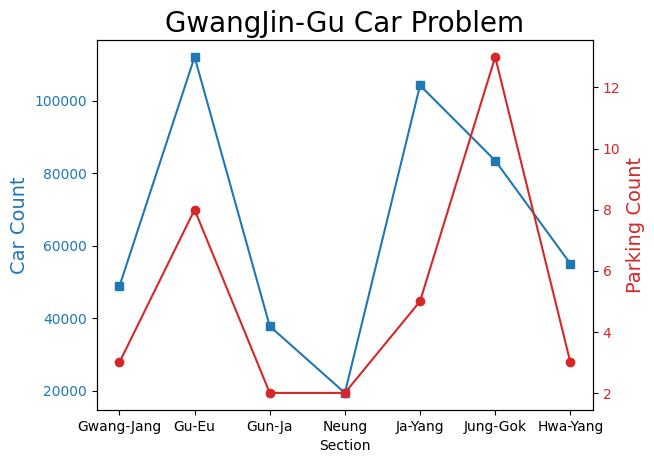

In [47]:
fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('GwangJin-Gu Car Problem', fontsize = 20)
ax1.set_xlabel('Section')
ax1.set_ylabel('Car Count', fontsize = 14, color=color_1)
ax1.plot(car_cctv_df.Section, car_cctv_df.Count, marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)
ax2 = ax1.twinx()
color_2 = 'tab:red'
ax2.set_ylabel('Parking Count', fontsize=14, color=color_2)
ax2.plot(car_cctv_df.Section, car_cctv_df.Parking, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)